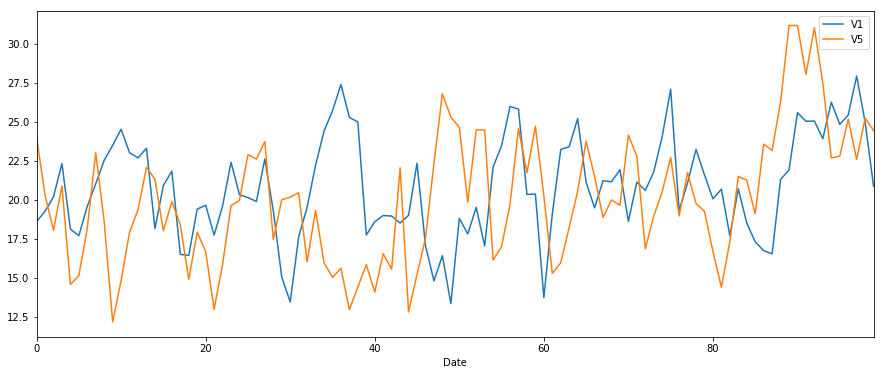

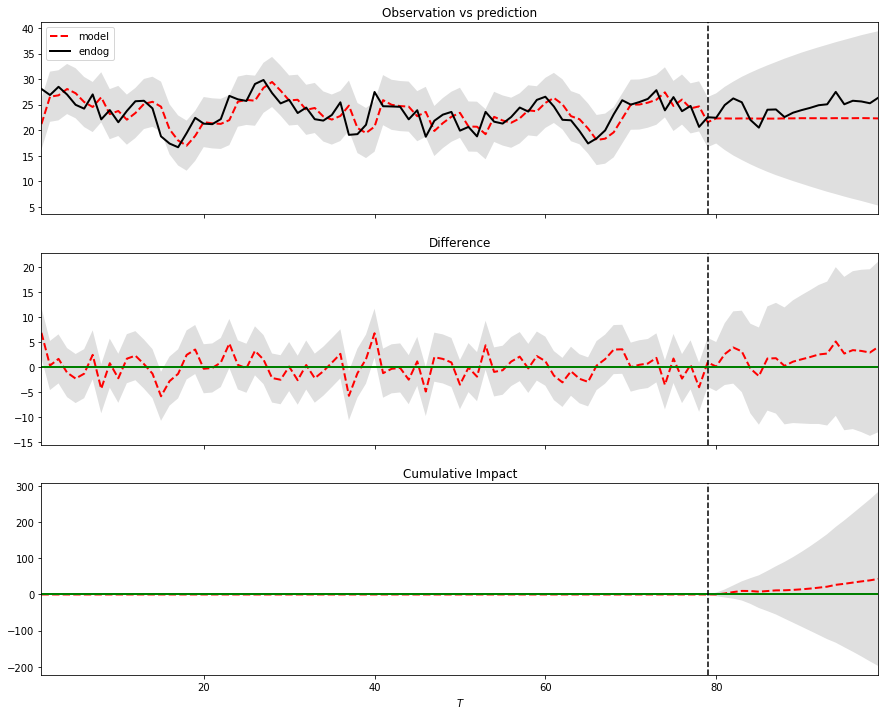

                         Average       Cumulative
Actual                        24              489
Predicted                     22              446
95% CI                  [10, 34]       [205, 687]
                                                 
Absolute Effect                2               43
95% CI                  [14, -9]      [284, -197]
                                                 
Relative Effect             9.7%             9.7%
95% CI           [63.6%, -44.3%]  [63.6%, -44.3%]

 During the post-intervention period, the response variable had an average value of approx. 24.  By contrast, in  the
absence of an intervention, we would have expected an average response of 22. The 95% interval of this counterfactual
prediction is [10, 34]. Subtracting this prediction from the observed response yields an estimate of the causal effect
the intervention had on the response variable. This effect is 2 with a 95% interval of [14, -9]. For a discussion of the
significance of this ef

In [5]:
#!pip install git+https://github.com/jamalsenouci/causalimpact.git
from causalimpact import CausalImpact
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

test = pd.read_csv('test.data.csv')
test = test.drop(test.columns[0], axis=1)
date_range = pd.date_range(start="2016-03-22", periods=100)
test['Date'] = date_range

#In the dataset V1 does not have a trend. We illustrate this by plotting it with V5, which has a trend. 
test[['V1','V5']].plot()
plt.xlabel('Date')
plt.show()


pre_period = [0,79]
post_period = [80,99]

test_ = test[['V3', 'V1']]
impact = CausalImpact(test_, pre_period, post_period, model_args={"niter":5000, "nseasons":7})
impact.run()
impact.plot()
impact.summary()
print()
impact.summary("report")

# Dataset 5

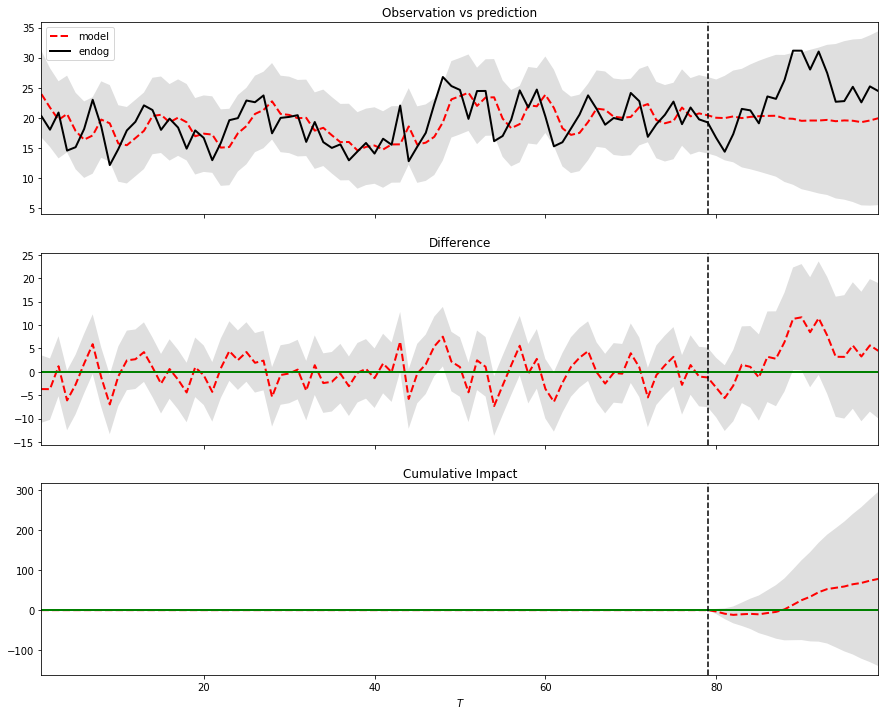

                         Average       Cumulative
Actual                        23              474
Predicted                     19              396
95% CI                   [8, 30]       [178, 614]
                                                 
Absolute Effect                3               78
95% CI                  [14, -6]      [296, -139]
                                                 
Relative Effect            19.7%            19.7%
95% CI           [74.7%, -35.3%]  [74.7%, -35.3%]


In [6]:
test_ = test[['V5', 'V1']]
impact = CausalImpact(test_, pre_period, post_period, model_args={"niter":5000, "nseasons":7})
impact.run()
impact.plot()
impact.summary()